In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.express as px

In [2]:
#load the data
import sys
sys.path.append('../')
df = pd.read_csv('HINDALCO.csv', index_col=False, delimiter = ',')
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))
df.head()

,datetime,close,high,low,open,volume,instrument
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO


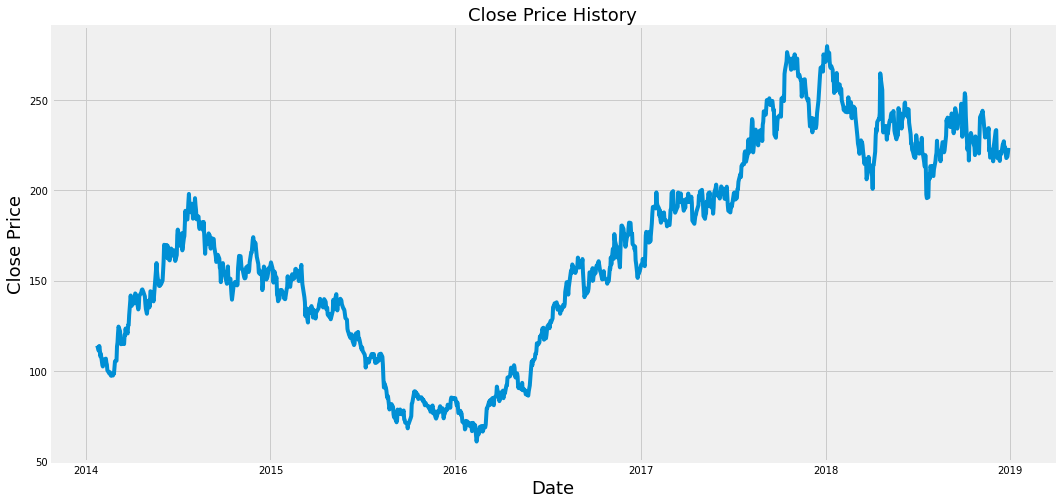

In [3]:
#visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize =18)
plt.show()

In [4]:
#create a function to calculate the simple moving average(SMA)
def SMA(data, period = 30, column = 'close'):
    return data[column].rolling(window=period).mean()

In [5]:
#Create two new columns to store the 20 day and 50 day SMA
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [6]:
#Get the buy and sell signals
#it will be represented by '1' if the SMA20 crosses the SMA50
#and by '0' if SMA20 doesn't cross the SMA50
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff() #subtract furthest day price from current day price



In [7]:
#seperating buy and sell orders
#1 means the SMA for the short term (200 is above the SMA for the long term(50)
df['Buy'] = np.where(df['Position'] == 1, df['close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['close'], np.NAN)

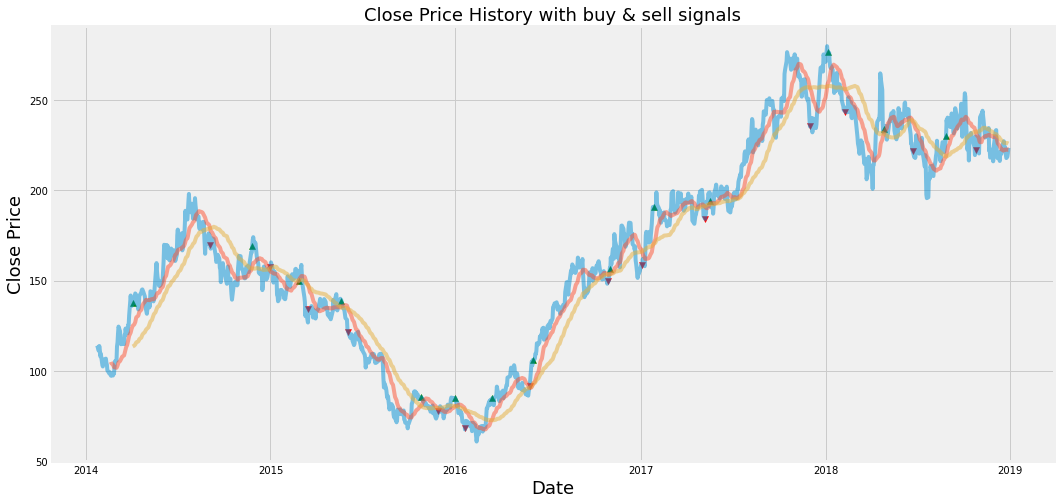

In [8]:
#visually show the close price with the SMAs and buy and sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History with buy & sell signals', fontsize=18)
plt.plot(df['close'], alpha = 0.5, label = 'close')
plt.plot(df['SMA20'], alpha = 0.5, label = 'SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label = 'SMA50')
plt.scatter(df.index, df['Buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize =18)
plt.show()

In [9]:
#table to show all sell signals
df[df['Position'] == -1]

,datetime,close,high,low,open,volume,instrument,SMA20,SMA50,Signal,Position,Buy,Sell
2014-09-04 00:00:00,2014-09-04 00:00:00,169.50,174.95,165.85,173.30,6861332,HINDALCO,178.5850,179.107,0,-1.0,NaN,169.50
2014-12-31 00:00:00,2014-12-31 00:00:00,157.55,159.70,156.40,156.45,4327309,HINDALCO,155.6550,156.608,0,-1.0,NaN,157.55
2015-03-17 00:00:00,2015-03-17 00:00:00,134.25,134.75,126.80,128.00,9699896,HINDALCO,146.8825,147.065,0,-1.0,NaN,134.25
2015-06-04 00:00:00,2015-06-04 00:00:00,121.30,123.55,119.00,122.30,3192106,HINDALCO,133.9525,134.213,0,-1.0,NaN,121.30
2015-11-27 00:00:00,2015-11-27 00:00:00,77.65,79.10,75.20,75.30,12432617,HINDALCO,79.1975,79.530,0,-1.0,NaN,77.65
2016-01-21 00:00:00,2016-01-21 00:00:00,68.30,69.35,66.80,69.00,5883512,HINDALCO,78.1025,78.205,0,-1.0,NaN,68.30
2016-05-27 00:00:00,2016-05-27 00:00:00,91.90,92.70,90.85,91.00,11544310,HINDALCO,90.5550,90.778,0,-1.0,NaN,91.90
2016-10-28 00:00:00,2016-10-28 00:00:00,149.65,150.40,148.00,148.50,4501956,HINDALCO,153.2875,153.581,0,-1.0,NaN,149.65
2017-01-04 00:00:00,2017-01-04 00:00:00,158.90,161.60,157.45,158.90,7732019,HINDALCO,165.7600,166.219,0,-1.0,NaN,158.90
2017-05-08 00:00:00,2017-05-08 00:00:00,184.20,187.90,181.60,187.60,15591759,HINDALCO,191.0250,191.218,0,-1.0,NaN,184.20


In [10]:
#table to show all buy signals
df[df['Position'] == 1]

,datetime,close,high,low,open,volume,instrument,SMA20,SMA50,Signal,Position,Buy,Sell
2014-04-04 00:00:00,2014-04-04 00:00:00,137.65,139.40,136.10,137.90,5444146,HINDALCO,124.9500,113.530,1,1.0,137.65,NaN
2014-11-26 00:00:00,2014-11-26 00:00:00,169.15,169.80,162.15,164.60,7594843,HINDALCO,157.6650,156.692,1,1.0,169.15,NaN
2015-02-26 00:00:00,2015-02-26 00:00:00,149.75,154.00,148.00,153.10,9010829,HINDALCO,150.0400,149.911,1,1.0,149.75,NaN
2015-05-20 00:00:00,2015-05-20 00:00:00,138.95,140.65,138.15,140.65,3050410,HINDALCO,135.5500,135.181,1,1.0,138.95,NaN
2015-10-26 00:00:00,2015-10-26 00:00:00,85.40,86.90,84.85,86.30,5855329,HINDALCO,80.7625,80.455,1,1.0,85.40,NaN
2016-01-01 00:00:00,2016-01-01 00:00:00,84.90,85.25,84.00,84.70,2806421,HINDALCO,80.5650,80.418,1,1.0,84.90,NaN
2016-03-14 00:00:00,2016-03-14 00:00:00,84.90,86.00,84.20,84.50,6642436,HINDALCO,73.2825,72.736,1,1.0,84.90,NaN
2016-06-02 00:00:00,2016-06-02 00:00:00,106.05,106.35,102.20,102.75,12148730,HINDALCO,92.5650,92.499,1,1.0,106.05,NaN
2016-11-02 00:00:00,2016-11-02 00:00:00,156.50,158.20,153.15,154.80,11309743,HINDALCO,153.6075,153.546,1,1.0,156.50,NaN
2017-01-27 00:00:00,2017-01-27 00:00:00,190.75,195.00,188.05,190.50,19584307,HINDALCO,170.9875,170.441,1,1.0,190.75,NaN


In [11]:
#strategy performance
#create backtest and position classes

class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        
    def close_position(self, close_datetime, close_price): #function to close position
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
        
    def _asdict(self):
        return {
            'open_datetime' : self.open_datetime,
            'open_price' : self.open_price,
            'order_type' : self.order_type,
            'volume' : self.volume,
            'sl' : self.sl,
            'tp' : self.tp,
            'close_datetime' : self.close_datetime,
            'close_price' : self.close_price,
            'profit' : self.profit,
            'status' : self.status,            
        }

class Strategy:
    def __init__(self, df, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.positions = []
        self.data = df
        
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df
    
    def add_position(self, position):
        self.positions.append(position)
        return True
    
    #Logic
    def run(self):
        for i, data in self.data.iterrows():
            
            if data.Position == -1:
                for position in self.positions:
                    if position.status == 'open': 
                        position.close_position(data.datetime, data.close)
            
            if data.Position == 1:
                self.add_position(Position(data.datetime, data.close, 'buy', self.volume, 0, 0))
                
        return self.get_positions_df()

In [12]:
#Result of strategy performance with $10,000 
sma_crossover_strategy = Strategy(df, 10000, 1)
result = sma_crossover_strategy.run()

result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2014-04-04 00:00:00,137.65,buy,1,0,0,2014-09-04 00:00:00,169.50,31.85,closed,10031.85
1,2014-11-26 00:00:00,169.15,buy,1,0,0,2014-12-31 00:00:00,157.55,-11.60,closed,10020.25
2,2015-02-26 00:00:00,149.75,buy,1,0,0,2015-03-17 00:00:00,134.25,-15.50,closed,10004.75
3,2015-05-20 00:00:00,138.95,buy,1,0,0,2015-06-04 00:00:00,121.30,-17.65,closed,9987.10
4,2015-10-26 00:00:00,85.40,buy,1,0,0,2015-11-27 00:00:00,77.65,-7.75,closed,9979.35
5,2016-01-01 00:00:00,84.90,buy,1,0,0,2016-01-21 00:00:00,68.30,-16.60,closed,9962.75
6,2016-03-14 00:00:00,84.90,buy,1,0,0,2016-05-27 00:00:00,91.90,7.00,closed,9969.75
7,2016-06-02 00:00:00,106.05,buy,1,0,0,2016-10-28 00:00:00,149.65,43.60,closed,10013.35
8,2016-11-02 00:00:00,156.50,buy,1,0,0,2017-01-04 00:00:00,158.90,2.40,closed,10015.75
9,2017-01-27 00:00:00,190.75,buy,1,0,0,2017-05-08 00:00:00,184.20,-6.55,closed,10009.20
